# Analisis Penjualan Video Game Dengan Ulasan Tahun 2016.

&nbsp; Analisis laporan penjualan judul *video game* ke seluruh dunia dengan skor ulasan baik dari pembeli, maupun kritikus bertujuan untuk melihat apakah terdapat faktor-faktor yang mempengaruhinya. Wilayah penjualan dibagi menjadi 4, yaitu NA(*North America*), EU(*European Union*), JP(*japan*), dan yang terakhir adalah wilayah diluar dari yang telah disebutkan. Skor juga terbagi menjadi 2, ialah skor yang diberikan oleh kritikus, dan skor yang dikumpulkan dari para penikmat video game. Rating dari ESRB juga faktor penting pada video game, yaitu skor untuk mengevaluasi konten video game sesuai umur yang dituju.

&nbsp; Langkah pertama yang akan dilakukan adalah membersihkan data dari laporan yang ada. Lalu, setelah data telah bersih, akan dilakukan *EDA* yaitu mengeksplorasi data secara menyeluruh, seperti melihat jumlah video game yang telah terjual, membuat grafik penjualan dan skor, dan seterusnya. Langkah terakhir yang perlu dilakukan adalah membuat profil (*profiling*) pengguna tiap wilayah dan menguji beberapa hipotesis.

&nbsp; Hasil dari analisis akan dimanfaatkan untuk kampanye penjualan video game pada tahun 2017 mendatang.

## Pra-pemrosesan

&nbsp; Berikut akan dimuat laporan/dataset dan melakukan pra-pemrosesan dataset.

### Memuat Data

In [3]:
# Import library yang dibutuhkan

import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

In [4]:
# Memuat dataset kedalam DataFrame.

sales = pd.read_csv('/datasets/games.csv')
sales.head()


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


&nbsp; Kolom pada dataset adalah sebagai berikut:

- `Name` (nama)
- `Platform`
- `Year_of_Release` (tahun rilis)
- `Genre`
- `NA_sales` (penjualan di Amerika Utara dalam satuan juta USD)
- `EU_sales` (penjualan di Eropa dalam satuan juta USD)
- `JP_sales` (penjualan di Jepang dalam satuan juta USD)
- `Other_sales` (penjualan di negara lainnya dalam satuan juta USD)
- `Critic_Score` (skor ulasan dari kritikus, maksimal 100)
- `User_Score` (skor ulasan dari pengguna, maksimal 10)
- `Rating` (ESRB)


In [5]:
# Mengubah nama kolom menjadi lowercase

sales.columns = sales.columns.str.lower()
sales.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

&nbsp; Nama kolom diubah menjadi huruf kecil guna memudahkan analisa kedepannya.

In [6]:
# Memuat informasi DataFrame

sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


&nbsp; DataFrame mempunyai 167.715 baris, namun terdapat **6 kolom** yang mengandung nilai kosong. Tipe data pada beberapa kolom akan disesuaikan dengan nilai kolom itu sendiri.

In [7]:
# Cek duplikat dengan seluruh nilai kolom yang sama

sales.duplicated().sum()

0

&nbsp; Tidak terdapat baris dengan nilai seluruh kolom yang sama pada DataFrame. 

&nbsp; Langkah berikutnya adalah mengubah tipe data yang kurang sesuai dan mengatasi nilai-nilai yang hilang pada beberapa kolom.

### Menyesuaikan Tipe Data dan Nilai Kolom

&nbsp; Dikarenakan terdapat nilai 'tbd' pada kolom `user_score`, maka akan nilai tersebut akan di-*assign* menjadi nilai kosong terlebih dahulu. Kolom `user_score` juga akan disesuaikan dengan kolom `critic_score` dengan membaginya dengan 10 untuk kebutuhan proses analisa. Nilai kosong akan diatasi pada sub bagian selanjutnya.

In [8]:
# Mengubah nilai tbd menjadi nilai kosong, mengubah keseluruhan kolom menjadi tipe data float64, 
# dan mengalikannya dengan 10

sales['user_score'] = (sales['user_score'].replace('tbd', np.nan)\
                       .astype(np.float64))*10

In [9]:
# Kolom `rating` menjadi kategorikal

sales['rating'] = sales['rating'].astype('category')

In [10]:
# Cek kesesuaian tipe data kolom

sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16713 non-null  object  
 1   platform         16715 non-null  object  
 2   year_of_release  16446 non-null  float64 
 3   genre            16713 non-null  object  
 4   na_sales         16715 non-null  float64 
 5   eu_sales         16715 non-null  float64 
 6   jp_sales         16715 non-null  float64 
 7   other_sales      16715 non-null  float64 
 8   critic_score     8137 non-null   float64 
 9   user_score       7590 non-null   float64 
 10  rating           9949 non-null   category
dtypes: category(1), float64(7), object(3)
memory usage: 1.3+ MB


In [11]:
sales.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Mengatasi Nilai yang Hilang

In [12]:
sales.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

#### Kolom `name`

In [13]:
sales[sales['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


&nbsp; Nilai hilang berkemungkinan dikarenakan tahun rilis vidio game tersebut sudah terlalu lampau sehingga judul tidak tercatat. Jumlah baris dengan nilai yang hilang hanya 2, dan baris-baris tersebut memiliki 5 nilai kolom yang hilang, sehingga baris tersebut akan dihilangkan.

In [14]:
sales = sales[sales['name'].notna()]
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16713 non-null  object  
 1   platform         16713 non-null  object  
 2   year_of_release  16444 non-null  float64 
 3   genre            16713 non-null  object  
 4   na_sales         16713 non-null  float64 
 5   eu_sales         16713 non-null  float64 
 6   jp_sales         16713 non-null  float64 
 7   other_sales      16713 non-null  float64 
 8   critic_score     8137 non-null   float64 
 9   user_score       7590 non-null   float64 
 10  rating           9949 non-null   category
dtypes: category(1), float64(7), object(3)
memory usage: 1.4+ MB


#### Kolom `Year_of_Release`

In [15]:
# Memuat baris dengan nilai kosong pada kolom `year_of_release`

sales[sales['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,85.0,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,64.0,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,79.0,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,65.0,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,67.0,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [16]:
# Persentase baris dengan nilai kosong pada kolom `year_of_release` dengan jumlah baris keseluruhan

ms_value = 269/len(sales)*100
print(f'{ms_value}%')

1.6095255190570215%


&nbsp; Kolom `year_of_release` memiliki nilai kosong mungkin dikarenakan terdapat kelalaian dari pencatatan laporan atau *human error*, sebab judul game-game tersebut adalah keluaran dengan tahun yang tergolong baru . Nilai kosong pada kolom tersebut berjumlah tidak lebih dari 2%, sehingga baris-baris tersebut juga akan dihilangkan.

In [17]:
# Drop baris dengan nilai kosong pada kolom `year_of_release`

sales = sales[sales['year_of_release'].notna()]
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16444 non-null  object  
 1   platform         16444 non-null  object  
 2   year_of_release  16444 non-null  float64 
 3   genre            16444 non-null  object  
 4   na_sales         16444 non-null  float64 
 5   eu_sales         16444 non-null  float64 
 6   jp_sales         16444 non-null  float64 
 7   other_sales      16444 non-null  float64 
 8   critic_score     7983 non-null   float64 
 9   user_score       7463 non-null   float64 
 10  rating           9768 non-null   category
dtypes: category(1), float64(7), object(3)
memory usage: 1.4+ MB


#### Kolom `critic_score`

In [18]:
# Memuat baris dengan nilai kosong pada kolom `critic_score`

sales[sales['critic_score'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


In [19]:
sales['critic_score'].describe()

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

&nbsp; Alasan adanya nilai kosong tampaknya dikarenakan judul-judul tersebut adalah judul jaman dahulu, dan/atau terlewatkan dari para pengguna dan kritikus. Nilai kosong pada kolom `critic_score` akan diisi nilai rata-rata sesuai dengan genrenya.

In [20]:
# Dictionary acuan untuk pengisian nilai `critic_score` berdasarkan genre

cscore_dict = sales.groupby('genre')['critic_score'].mean().to_dict()
cscore_dict

{'Action': 66.67693138843867,
 'Adventure': 65.26875,
 'Fighting': 69.15555555555555,
 'Misc': 66.6483300589391,
 'Platform': 68.12448979591836,
 'Puzzle': 67.23181818181818,
 'Racing': 68.00689655172414,
 'Role-Playing': 72.65526675786593,
 'Shooter': 70.26002166847238,
 'Simulation': 68.60919540229885,
 'Sports': 71.9931330472103,
 'Strategy': 72.15878378378379}

In [21]:
sales.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [22]:
# Mengisi nilai kosong pada kolom `critic_score` 

sales.critic_score = sales.critic_score.fillna(sales.genre.map(cscore_dict))
sales['critic_score'] = np.round(sales['critic_score'],1)
sales.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,68.1,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,72.7,NaN,NaN


In [23]:
# Cek nilai kosong

sales['critic_score'].isna().sum()

0

#### Kolom `user_score`

In [24]:
# Melihat jumlah baris dgn nilai kosong pada kolom `user_score`

sales['user_score'].isna().sum()

8981

In [25]:
sales['user_score'].describe()

count    7463.000000
mean       71.263299
std        14.994467
min         0.000000
25%        64.000000
50%        75.000000
75%        82.000000
max        97.000000
Name: user_score, dtype: float64

&nbsp; Alasan terdapat nilai kosong pada kolom ini tidak jauh berbeda dengan kolom `critic_score`, sehingga nilai kosong pada kolom `user_score` juga akan diisi nilai rata-rata sesuai dengan genrenya.

In [26]:
# Dictionary acuan untuk pengisian nilai `user_score` berdasarkan genre

uscore_dict = sales.groupby('genre')['user_score'].mean().to_dict()
uscore_dict

{'Action': 70.58129175946547,
 'Adventure': 71.39597315436242,
 'Fighting': 72.95949367088608,
 'Misc': 68.05827505827506,
 'Platform': 73.05896226415095,
 'Puzzle': 71.384,
 'Racing': 70.40858505564388,
 'Role-Playing': 76.24423337856173,
 'Shooter': 70.53259668508288,
 'Simulation': 71.32153392330383,
 'Sports': 69.51433857539315,
 'Strategy': 72.94426229508197}

In [27]:
# Mengisi nilai kosong pada kolom `user_score` 

sales['user_score'] = sales['user_score'].fillna(sales['genre'].map(uscore_dict))
sales['user_score'] = np.round(sales['user_score'],1)
sales.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,68.1,73.1,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,72.7,76.2,NaN


#### Kolom `rating`

In [28]:
# Cek baris dengan nilai kosong dan mengeksplorasi kolom `rating`

sales['rating'].isna().sum()

6676

In [29]:
sales['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

In [30]:
sales.groupby('genre')['rating'].value_counts().sort_values(ascending=False).head(15)

genre         rating
Sports        E         1162
Action        T          670
              M          596
Racing        E          576
Shooter       M          553
Action        E10+       468
Misc          E          449
Role-Playing  T          415
Action        E          410
Fighting      T          357
Platform      E          354
Shooter       T          340
Simulation    E          321
Puzzle        E          284
Misc          T          228
Name: rating, dtype: int64

&nbsp; Dikarenakan mayoritas rating ESRB pada judul-judul video game adalah E ataupun T, maka nilai kosong akan diubah dan digantikan oleh nilai T. 

In [31]:
# Perubahan nilai kosong pada kolom `rating`

sales['rating'] = sales['rating'].fillna('T')
sales['rating'].isna().sum()

0

#### Kolom lain

In [32]:
# Cek nilai pada kolom `platform'

sales[sales['platform']=='DS'].sort_values(by='year_of_release').head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15957,Strongest Tokyo University Shogi DS,DS,1985.0,Action,0.00,0.0,0.02,0.0,66.7,70.6,T
13463,Cocoto Kart Racer,DS,2004.0,Racing,0.04,0.0,0.00,0.0,68.0,70.4,E
11517,Kenshuui Tendo Dokuta,DS,2004.0,Simulation,0.00,0.0,0.08,0.0,68.6,71.3,T


&nbsp; Terdapat keanehan pada baris dengan nilai 1985 pada kolom `year_of_release` dimana berdasarkan data penjualan, game platform 'DS' terawal ada pada tahun 2004 keatas. Baris tersebut akan didrop untuk menghilangkan outlier pada kolom ini.

In [33]:
# Drop baris dengan nilai 1985 pada kolom `year_of_release`

sales.drop(sales[(sales['platform']=='DS')&(sales['year_of_release']==1985.0)].index,inplace=True)
sales.reset_index(drop=True,inplace=True)

sales[sales['platform']=='DS'].sort_values(by='year_of_release').head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
4360,The Urbz: Sims in the City (all regions sales),DS,2004.0,Simulation,0.4,0.01,0.02,0.0,68.6,71.3,T
12889,Tennis no Oji-Sama: 2005 Crystal Drive,DS,2004.0,Sports,0.0,0.00,0.05,0.0,72.0,69.5,T
11339,Kenshuui Tendo Dokuta,DS,2004.0,Simulation,0.0,0.00,0.08,0.0,68.6,71.3,T


### Total Penjualan pada Semua Wilayah

&nbsp; Total penjualan setiap judul video game akan dihitung ke dalam kolom terpisah yang akan dinamakan `total_sales` dalam satuan juta USD.

In [34]:
# Pembentukan kolom bernama total_sales

sales['total_sales'] = sales['na_sales'] + sales['eu_sales'] + sales['jp_sales'] + sales['other_sales']

In [35]:
sales.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,68.1,73.1,T,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,72.7,76.2,T,31.38


## Analisa Data

### Banyak penjualan per tahun

In [36]:
sales.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,68.1,73.1,T,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,72.7,76.2,T,31.38


<AxesSubplot:xlabel='year_of_release'>

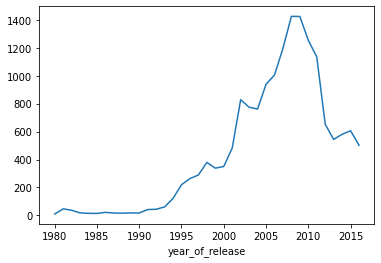

In [122]:
# Banyak video game yang rilis tiap tahun

games_yor = sales.groupby('year_of_release')['name'].count()
games_yor.plot(kind='line')

&nbsp; Pengambilan data dimulai sejak tahun 1980 dan berakhir pada bulan terakhir tahun 2016. Banyak game yang dirilis mengalami peningkatan dari sekitar tahun 1995 dengan jumlah dibawah 100 buah dan mencapai puncaknya pada tahun 2008 yaitu sebanyak 1400 judul pertahunnya. Namun, banyaknya judul dirilis tiap tahunnya menurun dengan cukup signifikan hingga tahun 2013. 

### Distribusi Penjualan tiap Platform

In [38]:
lists = sales['platform'].unique()
lists

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

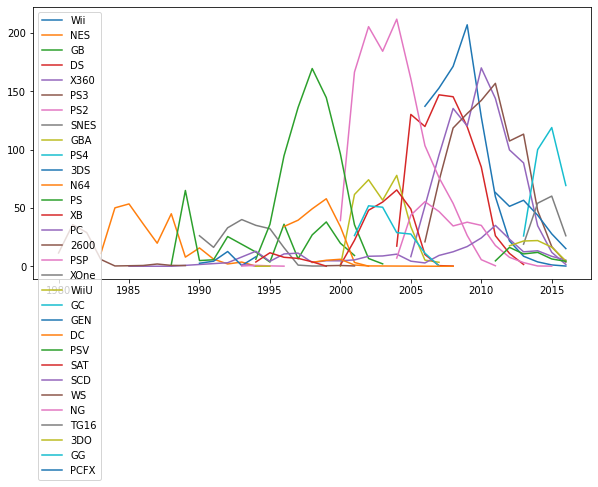

In [39]:
# Distribusi penjualan game pada platform beserta grafik line chart

fig, ax= plt.subplots(figsize=(10,5))

i = 0
platform = []
for platf in lists:
    top_platform = sales[sales['platform']==platf]
    platform.append(top_platform.groupby('year_of_release')['total_sales'].sum())

for line, name in zip(platform, lists):
    ax.plot(line, label=name)
    
ax.legend()
plt.show()

&nbsp; Terdapat sedikit banyak point penting dari grafik diatas:
- Diantara tahun 2000 dan 2005, puncak penjualan video terbanyak terdapat pada platfom PS2 dengan angka mencapai lebih dari 200 juta usd sebanyak 2 kali.
- Diikuti dengan platform Wii dengan angka penjualan 200 juta usd pada tahun 2008/2009.
- Plaform PC adalah platform pertama untuk penjualan video game yang dimulai sejak tahun 1985 hingga saat ini. Penjualan game platform tersebut memuncak pada tahun 2011 dengan penjualan sebesar lebih dari 30 juta USD.
- Platform muncul dan memudar tidak lebih dari 10 tahun

&nbsp; Namun, grafik tersebut terlalu luas untuk dianalisa lebih lanjut, dan analisa data yang diperlukan adalah kampanye untuk tahun 2017. Platform muncul dan memudar tidak lebih dari 10 tahun, sehingga data akan di-filter untuk tahun 2007 dan keatas.

In [40]:
# Filter data dengan judul rilis diatas tahun 2007

new_sales = sales[sales['year_of_release']>2007]
new_sales['year_of_release'].describe()

count    8130.000000
mean     2011.003690
std         2.482709
min      2008.000000
25%      2009.000000
50%      2010.000000
75%      2013.000000
max      2016.000000
Name: year_of_release, dtype: float64

In [41]:
# Melakukan analisa kembali dengan data yg telah difilter (new_sales)

lists = new_sales['platform'].unique()

i = 0
platform = []
for platf in lists:
    top_platform = new_sales[new_sales['platform']==platf]
    platform.append(top_platform.groupby('year_of_release')['total_sales'].sum())

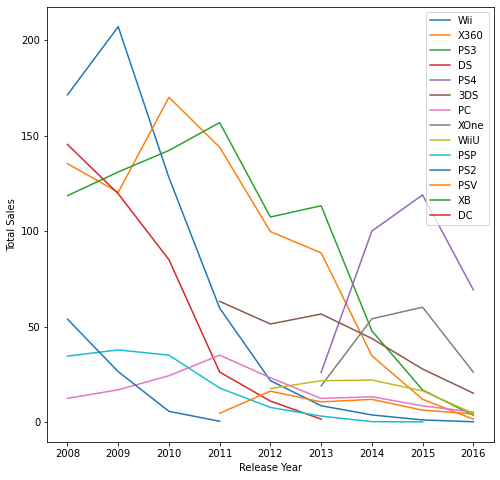

In [42]:
# Grafik penjualan game tiap tahun untuk semua platform

fig, ax= plt.subplots(figsize=(8,8))

for line, name in zip(platform, lists):
    ax.plot(line, label=name)

ax.set_xlabel('Release Year')
ax.set_ylabel('Total Sales')
ax.legend()
plt.show()

&nbsp;Grafik dengan data yang telah difilter menunjukkan beberapa hal seperti berikut:
- 3 Platform dengan potensi penjualan paling tidak lebih dari 10 juta usd pada tahun 2017 adalah platform PS4, XOne, dan 3DS.
- Melihat tahun-tahun sebelumnya, penjualan game platform PC akan stabil pada tahun 2017.

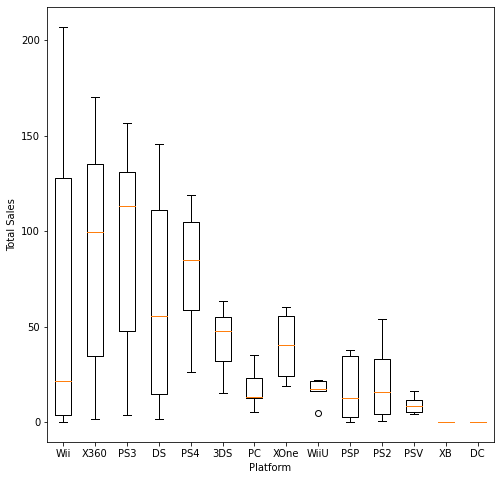

In [43]:
# Grafik boxplot total penjualan game tiap platform untuk data new_sales

fig, ax= plt.subplots(figsize=(8,8))

ax.boxplot(platform, labels=lists)

ax.set_xlabel('Platform')
ax.set_ylabel('Total Sales')

plt.show()

<AxesSubplot:xlabel='platform'>

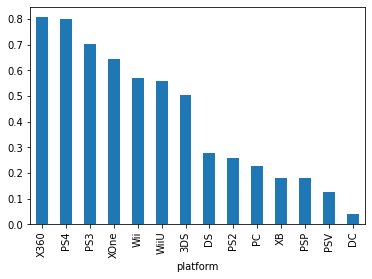

In [127]:
# Rata-rata penjualan tiap platform pada data new_sales

new_sales.groupby('platform')['total_sales'].mean().sort_values(ascending=False).plot(kind='bar')

- Distribusi penjualan game pada Platform Wii sangat bervariasi yaitu diantara 0 hingga 200 juta USD.
- Distribusi penjualan pada platform WiiU terlihat homogen atau tidak begitu bervariasi, yaitu dengan nilai mendekati 20 juta USD.
- Terkecuali platform XB dan DC, Median tertinggi penjualan game ada pada platform PS3 dengan nilai 120 juta USD, dan median terendah ada pada platform PSV dengan nilai mendekati 10 juta USD.
- Platform dengan rata-rata penjualan tertinggi adalah X360 dan PS4 dengan nilai kurang lebih 0,8 juta USD.

<AxesSubplot:xlabel='platform'>

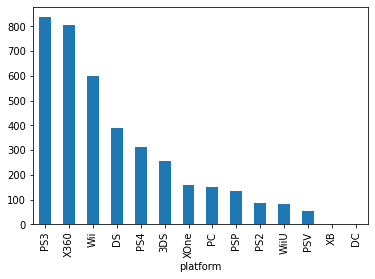

In [128]:
# Total penjualan game tiap plaform pada data new_sales

new_sales.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar')

&nbsp; Platform PS3 adalah platform dengan penjualan video game tertinggi pada tahun 2007 keatas, berjumlah 837 juta USD. Diikuti dengan X360 dan Wii. Platform XB dan DC memiliki penjualan yang sangat rendah, yakni dengan angka tidak lebih dari 500 ribu USD.

### Korelasi Ulasan dengan Penjualan

&nbsp; Pengaruh penjualan game terhadap skor dari kritikus dan pengguna akan dihitung, lalu divisualisasikan menggunakan grafik dan fungsi `.corr`. Perhitungan akan dilakukan pada platform PS3.

In [46]:
# Memuat matriks korelasi PS3 pada data new_sales

cor_sales = new_sales[new_sales['platform']=='PS3'].drop(columns=['year_of_release', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales'])
cor_sales.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.528400,0.421588
user_score,0.528400,1.000000,0.070918
total_sales,0.421588,0.070918,1.000000


array([[<AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='total_sales', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='total_sales', ylabel='user_score'>],
       [<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='total_sales'>,
        <AxesSubplot:xlabel='total_sales', ylabel='total_sales'>]],
      dtype=object)

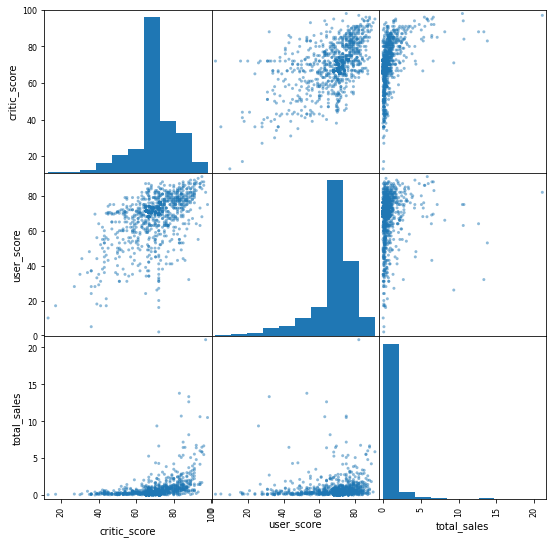

In [47]:
# Grafik scatterplot

pd.plotting.scatter_matrix(cor_sales, figsize=(9,9))

&nbsp; Korelasi jumlah penjualan game pada platform PS3 dengan skor dari pengguna, hampir tidak berpengaruh sama sekali, dan korelasinya dengan skor dari para kritikus, sedikit berpengaruh terhadap total penjualan berbanding lurus.

#### Pengaruh Genre terhadap Keuntungan Penjualan

<AxesSubplot:xlabel='genre'>

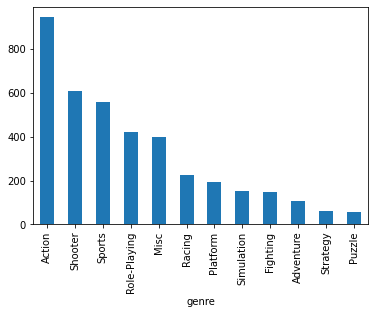

In [48]:
# Distribusi genre pada keuntungan penjualan

genre_total = new_sales.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
genre_total.plot(kind='bar')

&nbsp; Genre video game dengan toal revenue tertinggi ada pada genre 'Action', dengan nilai sebesar lebih dari 800 juta USD. Diikuti dengan game bergenre 'Shooter' dan 'Sports' yang berkisar 600 juta USD.

### Penjualan Game untuk Semua Platform tiap Daerah

In [49]:
# Penjualan platform pada pada wilayah NA, EU, dan JP

platform_region = {}
for region,name in zip(['na_sales', 'eu_sales', 'jp_sales'],['na','eu','jp']):
    platform_region[name] = new_sales.groupby('platform')[region].sum().sort_values(ascending=False).head()
    print(platform_region[name])
    print('\n')

platform
X360    490.69
PS3     349.13
Wii     332.87
DS      198.73
PS4     108.74
Name: na_sales, dtype: float64


platform
PS3     293.73
X360    234.88
Wii     170.74
PS4     141.09
PC       92.17
Name: eu_sales, dtype: float64


platform
3DS    100.62
DS      76.12
PS3     74.11
PSP     60.46
Wii     47.01
Name: jp_sales, dtype: float64




&nbsp; Platform teratas pada wilayah barat (NA,EU) adalah X360 dan PS3. Namun, pada wilayah JP platform teratas diduduki oleh 3DS dan diikuti dengan DS. PS3 terletak pada posisi ke-3 pada wilayah JP. Data menunjukkan bahwa NA dan EU menyukai platform *non-handheld*, sedangkan jepang menyukai sebaliknya.

In [50]:
# Peringkat penjualan genre pada wilayah NA, EU, dan JP

for region,name in zip(['na_sales', 'eu_sales', 'jp_sales'],['na','eu','jp']):
    print(new_sales.groupby('genre')[region].sum().sort_values(ascending=False).head())
    print('\n')


genre
Action          433.74
Shooter         311.26
Sports          276.27
Misc            211.61
Role-Playing    155.81
Name: na_sales, dtype: float64


genre
Action          310.59
Shooter         208.35
Sports          185.19
Misc            107.00
Role-Playing     94.46
Name: eu_sales, dtype: float64


genre
Role-Playing    138.12
Action           90.16
Misc             37.33
Sports           30.69
Adventure        23.36
Name: jp_sales, dtype: float64




&nbsp; Semua wilayah penjualan menyukai Action dan Misc, dan ketiga wilayah menempatkan genre Action pada posisi 1 ataupun 2. Namun, genre Shooter hanya disukai oleh wilayah EU ataupun NA, Sedangkan di wilayah Japan, diminati Role-Playing sebagai nomor 1 dalam peringkat penjualan genre yang paling diminati. 

In [51]:
# Pengaruh Rating terhadap wilayah NA, EU, dan JP

for region,name in zip(['na_sales', 'eu_sales', 'jp_sales'],['na','eu','jp']):
    print(new_sales.groupby('rating')[region].sum().sort_values(ascending=False).head())
    print('\n')


rating
E       536.93
T       521.92
M       502.60
E10+    251.88
EC        1.32
Name: na_sales, dtype: float64


rating
T       376.47
M       362.65
E       326.61
E10+    144.53
RP        0.03
Name: eu_sales, dtype: float64


rating
T       285.11
E        77.17
M        39.33
E10+     25.67
AO        0.00
Name: jp_sales, dtype: float64




&nbsp; Rating dengan penjualan terbanyak ada pada rating E, M, dan T pada semua wilayah, dengan jarak yang tidak terlampau jauh. Terkecuali wilayah jepang, jarak penjualan T, genre tertinggi pada wilayah tersebut, dengan lainnya terbilang cukup jauh. Perbedaan melampui 4x lebih sedikit dari penjualan game dengan genre T.

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Uji Hipotesis Statistik

&nbsp; Uji hipotesis rata-rata rating pada beberapa aspek akan dilakukan pada sub-bab ini. Pengujian tersebut adalah sebagai berikut:

1. Rata-rata rating pengguna platform Xbox One dan PC adalah sama.
2. Rata-rata rating pengguna genre Action dan Sports berbeda.
3. Pengujian dilakukan dengan tes **Student-T**.
4. Alpha(*level of significance*) akan ditentukan sebesar 5%, karena ini adalah ambang batas yang digunakan untuk keseimbangan antara risiko membuat hipotesis nol salah dan resiko membuat hipotesis nol itu tidak dapat ditolak.

In [104]:
# Cek Kembali 5 data pertama 

new_sales.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,84.0,E,28.32
14,Kinect Adventures!,X360,2010.0,Misc,15.00,4.89,0.24,1.69,61.0,63.0,E,21.82
15,Wii Fit Plus,Wii,2009.0,Sports,9.01,8.49,2.53,1.77,80.0,74.0,E,21.80


In [52]:
# Inisialisasi Alpha

alpha = 0.05

In [119]:
# Inisiasi 4 Dataframe uji hipotes untuk platform XOne dengan PC, dan genre Action dengan Sports

xbone = new_sales[new_sales['platform']=='XOne']
pc = new_sales[new_sales['platform']=='PC']

action = new_sales[new_sales['genre']=='Action']
sports = new_sales[new_sales['genre']=='Sports']

### Rata-rata rating pengguna platform Xbox One dan PC adalah Sama

&nbsp; Diketahui bahwa:

- Hipotesa nol adalah 'Rata-rata rating pengguna platform Xbox One dan PC adalah **Sama**'.
- Hipotesis alternatif adalah 'Rata-rata rating pengguna platform Xbox One dan PC adalah **Berbeda atau Tidak Sama**'. 

In [117]:
# Uji hipotesis dengan tes Student-T menggunakan 2 samp

samp1 = xbone['user_score']
samp2 = pc['user_score']

result = st.ttest_ind(samp1,samp2,equal_var=False)

print(result.pvalue)

if result.pvalue < alpha:
    print('Menolak kebenaran hipotesis 0')
else:
    print('Tidak dapat menolak kebenaran hipotesis 0')

0.1302288675487622
Tidak dapat menolak kebenaran hipotesis 0


&nbsp; Pengujian membuktikan *pvalue* hasil tes bernilai lebih dari level signifikansi, sehingga hipotesa nol 'Rata-rata rating pengguna platform Xbox One dan PC adalah Sama' **Tidak** dapat ditolak.

### Rata-rata rating pengguna genre Action dan Sports berbeda

&nbsp; Diketahui bahwa:
- Hipotesa nol adalah 'Rata-rata rating pengguna genre Action dan Sports adalah **Sama**'.
- Hipotesis alternatif adalah lRata-rata rating pengguna genre Action dan Sports **Berbeda**'. 

In [120]:
# Uji hipotesis dengan tes Student-T menggunakan 2 samp

samp1 = action['user_score']
samp2 = sports['user_score']

result = st.ttest_ind(samp1,samp2,equal_var=False)

print(result.pvalue)

if result.pvalue < alpha:
    print('Menolak kebenaran hipotesis 0')
else:
    print('Tidak dapat menolak kebenaran hipotesis 0')

1.578627816042678e-15
Menolak kebenaran hipotesis 0


&nbsp; Pengujian membuktikan *pvalue* hasil tes bernilai kurang dari level signifikansi, sehingga hipotesa nol 'Rata-rata rating pengguna genre Action dan genre Sports adalah Sama' **ditolak**.

## Kesimpulan Umum

&nbsp; Proses analisa laporan penjualan video ke penjuru dunia dengan skor dan tahun rilis dilakukan dengan beberapa cara. Membersihkan data, analisa pada beberapa kolom dan nilai yang telah diagregasi dan menguji hipotesa untuk rata-rata rating pengguna. Jumlah game yang dirilis puncaknya ada diantara tahun 2005 dan 2010 dengan jumlah lebih dari 1400 judul per tahunnya. Pada jangka waktu tersebut, konsol PS3, x360, dan Wii adalah platform yang merajai pasar video game.

&nbsp; Analisa pertama adalah analisa peminat genre dan platform Namun, pasar tiap wilayah memiliki peminat dengan genre yang berbeda. Wilayah barat(NA, EU), menyukai game dengan genre Action dan Shooter, tetapi Jepang menyukai genre yang berbeda yaitu genre Role-Playing. Begitu juga dengan rating, pangsa barat dikuasai oleh rating Teen, Mature, dan Everyone. Berbeda dengan Jepang, wilayah tersebut bisa disebut wilayah dengan satu rating, ialah pasar video game dengan rating Teen. Hal tersebut dikarenakan jarak penjualan game dengan rating Teen dengan yang lain terbilang cukup jauh.

&nbsp; Analisa terakhir yang dilakukan adalah menguji 2 hipotesis untuk rata-rata skor pengguna. Hipotesa bahwa rata-rata skor pengguna adalah sama pada platform Xbox One dan PC, tidak dapat ditolak. Hipotesa kedua bahwa Rata-rata skor pengguna genre Action dan genre Sports adalah Sama, harus ditolak.